In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
LoadX = pd.read_csv('Diabetes_XTrain.csv')
LoadY = pd.read_csv('Diabetes_YTrain.csv')

In [3]:
valueX = LoadX.values
valueY = LoadY.values
print(valueX.shape,valueY.shape)

(576, 8) (576, 1)


In [4]:
print(valueX.shape,valueY.shape)

(576, 8) (576, 1)


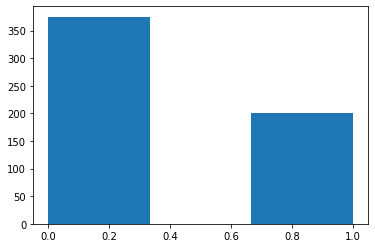

In [5]:
plt.hist(valueY,3)
plt.show()

In [6]:
def distance(x1,x2):
    return np.linalg.norm(x1-x2)

In [7]:
def knn(x,y,querypoint, k = 1):
    values = []
    for i in range(x.shape[0]):
        dist = distance(x[i],querypoint)
        values.append((dist,y[i]))
        
    values = sorted(values)
    values = values[:k]
    values = np.array(values)
    
    new_values = np.unique(values[:,1],return_counts=True)
    index = new_values[1].argmax()
    prediction = new_values[0][index]
    return prediction

In [8]:
test = pd.read_csv('Diabetes_XTest.csv')
testX = test.values

output = []
for i in range(testX.shape[0]):
    output.append(knn(valueX,valueY,testX[i]))

output = np.squeeze(output)
df = pd.DataFrame({'Output': output})
df.to_csv('output.csv',index= False) 
print('finished : check file Output.csv')

finished : check file Output.csv
